In [27]:
import pandas as pd

df = pd.read_csv('dengue_mod.csv')

print('Información del DataFrame:')
df.info()

print('\nPrimeras 5 filas del DataFrame:')
display(df.head())

Información del DataFrame:
<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad_             53813 non-null  int64  
 1   sexo_             53812 non-null  str    
 2   comuna            50419 non-null  str    
 3   tipo_ss_          53808 non-null  str    
 4   tip_cas_          53812 non-null  float64
 5   pac_hos_          53812 non-null  float64
 6   clas_dengue       41858 non-null  float64
 7   cefalea           53596 non-null  float64
 8   dolrretroo        42226 non-null  float64
 9   malgias           53598 non-null  float64
 10  artralgia         53597 non-null  float64
 11  erupcionr         42225 non-null  float64
 12  dolor_abdo        53594 non-null  float64
 13  vomito            53595 non-null  float64
 14  somnolenci        27160 non-null  float64
 15  hipotensio        42225 non-null  float64
 16  hepatomeg         42225 

,edad_,sexo_,comuna,tipo_ss_,tip_cas_,pac_hos_,clas_dengue,cefalea,dolrretroo,malgias,...,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento
0,49,M,belen,C,2.0,1.0,NaN,2.0,NaN,1.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,M,belen,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,M,villa hermosa,C,2.0,2.0,NaN,2.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,M,NaN,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,M,la candelaria,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for col in df.columns:
    if col != 'edad_':
        df[col] = df[col].astype('category')

print('Información del DataFrame después de la conversión de tipos:')
df.info()

Información del DataFrame después de la conversión de tipos:
<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             53813 non-null  int64   
 1   sexo_             53812 non-null  category
 2   comuna            50419 non-null  category
 3   tipo_ss_          53808 non-null  category
 4   tip_cas_          53812 non-null  category
 5   pac_hos_          53812 non-null  category
 6   clas_dengue       41858 non-null  category
 7   cefalea           53596 non-null  category
 8   dolrretroo        42226 non-null  category
 9   malgias           53598 non-null  category
 10  artralgia         53597 non-null  category
 11  erupcionr         42225 non-null  category
 12  dolor_abdo        53594 non-null  category
 13  vomito            53595 non-null  category
 14  somnolenci        27160 non-null  category
 15  hipotensio        42

Eliminamos variables con baja correlación menor al 5%

In [29]:
columns_to_drop = ['artralgia', 'dolrretroo', 'erupcionr', 'hipotermia', 'malgias', 'sexo_']

df = df.drop(columns=columns_to_drop)

# Move 'pac_hos_' to the end
pac_hos_column = df['pac_hos_']
df = df.drop(columns=['pac_hos_'])
df['pac_hos_'] = pac_hos_column

print('DataFrame después de eliminar columnas y reordenar:')
display(df.head())

DataFrame después de eliminar columnas y reordenar:


,edad_,comuna,tipo_ss_,tip_cas_,clas_dengue,cefalea,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,aum_hemato,caida_plaq,acum_liquievento,pac_hos_
0,49,belen,C,2.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,47,belen,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,46,villa hermosa,C,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,45,NaN,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,46,la candelaria,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             53813 non-null  int64   
 1   comuna            50419 non-null  category
 2   tipo_ss_          53808 non-null  category
 3   tip_cas_          53812 non-null  category
 4   clas_dengue       41858 non-null  category
 5   cefalea           53596 non-null  category
 6   dolor_abdo        53594 non-null  category
 7   vomito            53595 non-null  category
 8   somnolenci        27160 non-null  category
 9   hipotensio        42225 non-null  category
 10  hepatomeg         42225 non-null  category
 11  hem_mucosa        27162 non-null  category
 12  aum_hemato        27162 non-null  category
 13  caida_plaq        27165 non-null  category
 14  acum_liquievento  27164 non-null  category
 15  pac_hos_          53812 non-null  category
dtypes: category(15), int64(1)
memory 

In [31]:
print(f"Número de filas antes de eliminar duplicados: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

Número de filas antes de eliminar duplicados: 53813
Número de filas después de eliminar duplicados: 38942


In [32]:
df.info()

<class 'pandas.DataFrame'>
Index: 38942 entries, 0 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             38942 non-null  int64   
 1   comuna            36643 non-null  category
 2   tipo_ss_          38937 non-null  category
 3   tip_cas_          38941 non-null  category
 4   clas_dengue       29481 non-null  category
 5   cefalea           38730 non-null  category
 6   dolor_abdo        38728 non-null  category
 7   vomito            38729 non-null  category
 8   somnolenci        17955 non-null  category
 9   hipotensio        29843 non-null  category
 10  hepatomeg         29843 non-null  category
 11  hem_mucosa        17957 non-null  category
 12  aum_hemato        17957 non-null  category
 13  caida_plaq        17960 non-null  category
 14  acum_liquievento  17959 non-null  category
 15  pac_hos_          38941 non-null  category
dtypes: category(15), int64(1)
memory usage

In [33]:
print(f"Número de filas antes de eliminar filas con 3 o más nulos: {df.shape[0]}")

df_cleaned = df[df.isnull().sum(axis=1) < 3]

#3 filas corresponde a +15% de valores faltantes
print(f"Número de filas después de eliminar filas con 3 o más nulos: {df_cleaned.shape[0]}")

display(df_cleaned.head())

Número de filas antes de eliminar filas con 3 o más nulos: 38942
Número de filas después de eliminar filas con 3 o más nulos: 17958


,edad_,comuna,tipo_ss_,tip_cas_,clas_dengue,cefalea,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,aum_hemato,caida_plaq,acum_liquievento,pac_hos_
23553,26,laureles,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23879,37,san javier,N,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23893,26,NaN,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
24135,49,el poblado,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
24138,65,laureles,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [34]:
df_cleaned.info()
len(df_cleaned)

<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17195 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17722 non-null  category
 5   cefalea           17958 non-null  category
 6   dolor_abdo        17958 non-null  category
 7   vomito            17958 non-null  category
 8   somnolenci        17955 non-null  category
 9   hipotensio        17958 non-null  category
 10  hepatomeg         17958 non-null  category
 11  hem_mucosa        17957 non-null  category
 12  aum_hemato        17957 non-null  category
 13  caida_plaq        17958 non-null  category
 14  acum_liquievento  17957 non-null  category
 15  pac_hos_          17958 non-null  category
dtypes: category(15), int64(1)
memory u

17958

In [35]:
print('Porcentaje de valores nulos por columna:')
null_percentages = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print(null_percentages)

columns_to_drop_by_nulls = null_percentages[null_percentages > 15].index.tolist()

if columns_to_drop_by_nulls:
    print(f"\nColumnas a eliminar (más del 15% de nulos): {columns_to_drop_by_nulls}")
    df_cleaned = df_cleaned.drop(columns=columns_to_drop_by_nulls)
    print(f"DataFrame shape después de eliminar columnas: {df_cleaned.shape}")
else:
    print("\nNo se encontraron columnas con más del 15% de valores nulos.")

df_cleaned.info()

Porcentaje de valores nulos por columna:
edad_               0.000000
comuna              4.248803
tipo_ss_            0.000000
tip_cas_            0.000000
clas_dengue         1.314178
cefalea             0.000000
dolor_abdo          0.000000
vomito              0.000000
somnolenci          0.016706
hipotensio          0.000000
hepatomeg           0.000000
hem_mucosa          0.005569
aum_hemato          0.005569
caida_plaq          0.000000
acum_liquievento    0.005569
pac_hos_            0.000000
dtype: float64

No se encontraron columnas con más del 15% de valores nulos.
<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17195 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17722 non-

In [36]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Identify categorical columns with nulls
categorical_cols_with_nulls = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
categorical_cols_with_nulls = [col for col in categorical_cols_with_nulls if df_cleaned[col].dtype == 'category']

if not categorical_cols_with_nulls:
    print("No se encontraron columnas categóricas con valores nulos para imputar con KNN.")
else:
    print(f"Columnas categóricas con nulos a imputar: {categorical_cols_with_nulls}")

    # Create a copy for imputation to avoid modifying the original during intermediate steps
    df_imputed = df_cleaned.copy()

    # Dictionary to store LabelEncoders for inverse transformation
    label_encoders = {}

    # Prepare a temporary DataFrame for numerical imputation
    df_temp_numeric_impute = pd.DataFrame(index=df_imputed.index)

    for col in categorical_cols_with_nulls:
        le = LabelEncoder()
        # Fit LabelEncoder on all unique non-null values from the original df_cleaned column
        # This ensures all possible categories are learned before transformation
        le.fit(df_cleaned[col].dropna())
        label_encoders[col] = le

        # Transform the column: convert categories to integers, NaNs remain NaN
        # Use .apply() with a lambda to correctly handle NaNs while transforming
        df_temp_numeric_impute[col] = df_imputed[col].apply(lambda x: label_encoders[col].transform([x])[0] if pd.notna(x) else np.nan)

    # Initialize KNNImputer
    # n_neighbors can be adjusted based on data characteristics
    imputer = KNNImputer(n_neighbors=5)

    # Perform imputation on the temporary numeric DataFrame
    imputed_values_numeric = imputer.fit_transform(df_temp_numeric_impute)

    # Convert the imputed numpy array back to a DataFrame with appropriate column names
    df_imputed_numeric = pd.DataFrame(imputed_values_numeric, columns=categorical_cols_with_nulls, index=df_imputed.index)

    # Round the imputed values to the nearest integer (since they were originally integer labels)
    df_imputed_numeric = df_imputed_numeric.round().astype(int)

    # Inverse transform the imputed numeric values back to original categories
    for col in categorical_cols_with_nulls:
        le = label_encoders[col]
        num_classes = len(le.classes_)

        # Clip the imputed integer labels to the valid range [0, num_classes-1]
        # This prevents 'y contains previously unseen labels' errors if KNNImputer
        # predicts values outside the original label range.
        df_imputed[col] = le.inverse_transform(df_imputed_numeric[col].clip(0, num_classes - 1))
        df_imputed[col] = df_imputed[col].astype('category') # Ensure it's category type again

    # Now, update the original df_cleaned with the imputed columns
    df_cleaned[categorical_cols_with_nulls] = df_imputed[categorical_cols_with_nulls]

    print("\nImputación con KNN completada.")
    print("Verificando valores nulos después de la imputación:")
    print(df_cleaned[categorical_cols_with_nulls].isnull().sum())
    print("\nInformación del DataFrame después de la imputación:")
    df_cleaned.info()

Columnas categóricas con nulos a imputar: ['comuna', 'clas_dengue', 'somnolenci', 'hem_mucosa', 'aum_hemato', 'acum_liquievento']

Imputación con KNN completada.
Verificando valores nulos después de la imputación:
comuna              0
clas_dengue         0
somnolenci          0
hem_mucosa          0
aum_hemato          0
acum_liquievento    0
dtype: int64

Información del DataFrame después de la imputación:
<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17958 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17958 non-null  category
 5   cefalea           17958 non-null  category
 6   dolor_abdo        17958 non-null  category
 7   vomito            17958 non-null  category
 8   somnol

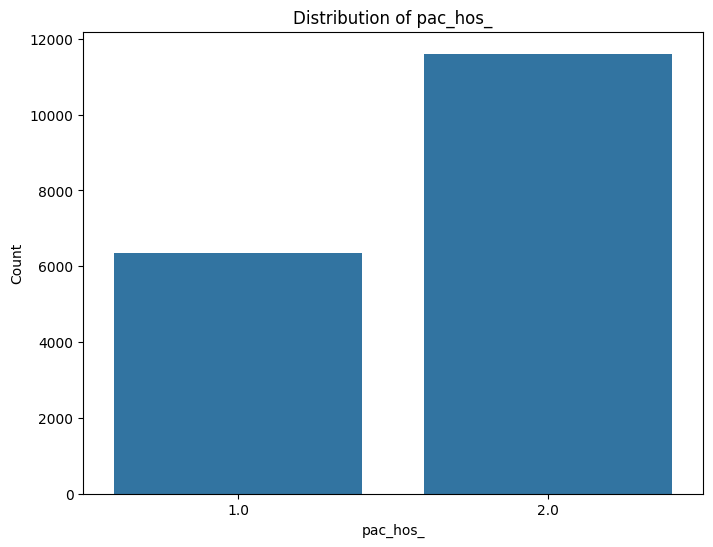

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pac_hos_' is the target variable
target_variable = 'pac_hos_'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df_cleaned)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()

In [38]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features (X) and target (y)
X = df_cleaned.drop('pac_hos_', axis=1)
y = df_cleaned['pac_hos_']

# Identify categorical columns for One-Hot Encoding
categorical_cols = X.select_dtypes(include='category').columns

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Drop original categorical columns and concatenate encoded ones
X_numeric = X.drop(columns=categorical_cols)
X_processed = pd.concat([X_numeric, X_encoded_df], axis=1)

print("Shape of X_processed before SMOTE:", X_processed.shape)
print("Distribution of target before SMOTE:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\nShape of X_resampled after SMOTE:", X_resampled.shape)
print("Distribution of target after SMOTE:\n", y_resampled.value_counts())

# Reconstruct the balanced DataFrame (optional, but good for further steps)
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("\nFirst 5 rows of the balanced DataFrame:")
display(df_balanced.head())

Shape of X_processed before SMOTE: (17958, 56)
Distribution of target before SMOTE:
 pac_hos_
2.0    11611
1.0     6347
Name: count, dtype: int64

Shape of X_resampled after SMOTE: (23222, 56)
Distribution of target after SMOTE:
 pac_hos_
1.0    11611
2.0    11611
Name: count, dtype: int64

First 5 rows of the balanced DataFrame:


,edad_,comuna_altavista,comuna_aranjuez,comuna_belen,comuna_buenos aires,comuna_castilla,comuna_corregimiento de san cristobal,comuna_corregimiento de santa elena,comuna_doce de octubre,comuna_el poblado,...,hepatomeg_2.0,hem_mucosa_1.0,hem_mucosa_2.0,aum_hemato_1.0,aum_hemato_2.0,caida_plaq_1.0,caida_plaq_2.0,acum_liquievento_1.0,acum_liquievento_2.0,pac_hos_
0,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
2,26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
3,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
4,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0


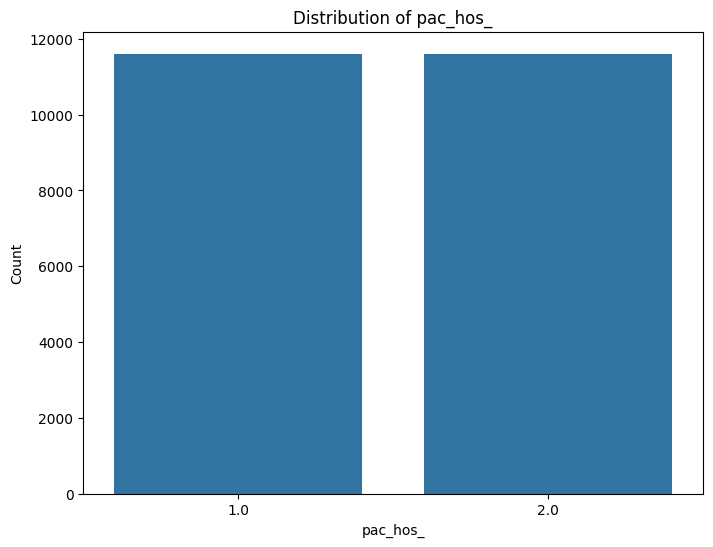

In [39]:
# Assuming 'pac_hos_' is the target variable
target_variable = 'pac_hos_'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df_balanced)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()

In [40]:
df_balanced.info()

<class 'pandas.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23222 non-null  int64   
 1   comuna_altavista                       23222 non-null  float64 
 2   comuna_aranjuez                        23222 non-null  float64 
 3   comuna_belen                           23222 non-null  float64 
 4   comuna_buenos aires                    23222 non-null  float64 
 5   comuna_castilla                        23222 non-null  float64 
 6   comuna_corregimiento de san cristobal  23222 non-null  float64 
 7   comuna_corregimiento de santa elena    23222 non-null  float64 
 8   comuna_doce de octubre                 23222 non-null  float64 
 9   comuna_el poblado                      23222 non-null  float64 
 10  comuna_guayabal                        23222 non-null  float64 
 11  

In [41]:
columns_to_drop_redundant = [
    'cefalea_2.0',
    'dolor_abdo_2.0',
    'vomito_2.0',
    'somnolenci_2.0',
    'hipotensio_2.0',
    'hem_mucosa_2.0',
    'aum_hemato_2.0',
    'caida_plaq_2.0',
    'acum_liquievento_2.0',
    'hepatomeg_2.0'
]

df_balanced = df_balanced.drop(columns=columns_to_drop_redundant)

print("DataFrame después de eliminar variables redundantes:")
df_balanced.info()

DataFrame después de eliminar variables redundantes:
<class 'pandas.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23222 non-null  int64   
 1   comuna_altavista                       23222 non-null  float64 
 2   comuna_aranjuez                        23222 non-null  float64 
 3   comuna_belen                           23222 non-null  float64 
 4   comuna_buenos aires                    23222 non-null  float64 
 5   comuna_castilla                        23222 non-null  float64 
 6   comuna_corregimiento de san cristobal  23222 non-null  float64 
 7   comuna_corregimiento de santa elena    23222 non-null  float64 
 8   comuna_doce de octubre                 23222 non-null  float64 
 9   comuna_el poblado                      23222 non-null  float64 
 10  comuna_guayabal 

In [42]:
df_balanced.info()

<class 'pandas.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23222 non-null  int64   
 1   comuna_altavista                       23222 non-null  float64 
 2   comuna_aranjuez                        23222 non-null  float64 
 3   comuna_belen                           23222 non-null  float64 
 4   comuna_buenos aires                    23222 non-null  float64 
 5   comuna_castilla                        23222 non-null  float64 
 6   comuna_corregimiento de san cristobal  23222 non-null  float64 
 7   comuna_corregimiento de santa elena    23222 non-null  float64 
 8   comuna_doce de octubre                 23222 non-null  float64 
 9   comuna_el poblado                      23222 non-null  float64 
 10  comuna_guayabal                        23222 non-null  float64 
 11  

In [43]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib
# Separate features (X) and target (y)
X_final = df_balanced.drop('pac_hos_', axis=1)
y_final = df_balanced['pac_hos_']

# Initialize LabelEncoder
label_encoder_target = LabelEncoder()

# Encode the target variable (default mapping: 1.0 -> 0, 2.0 -> 1)
y_encoded_raw = label_encoder_target.fit_transform(y_final)

# Adjust the encoded values to map 1.0 to 1 and 2.0 to 0
y_encoded = 1 - y_encoded_raw

print("Original target variable unique values:", y_final.unique())
print("Encoded target variable unique values:", np.unique(y_encoded))
print("Mapping of original values to encoded values (desired):")
for original_val, encoded_val_raw in zip(label_encoder_target.classes_, label_encoder_target.transform(label_encoder_target.classes_)):
    # Apply the inversion to show the desired mapping
    print(f"  {original_val} -> {1 - encoded_val_raw}")

print("\nDistribution of encoded target variable:")
print(pd.Series(y_encoded).value_counts())

joblib.dump(label_encoder_target, 'label_encoder_target.joblib')


# Store the encoded target variable and the encoder
# X_final contains the features (already one-hot encoded where applicable)
# y_encoded contains the label-encoded target
# label_encoder_target contains the fitted LabelEncoder object

Original target variable unique values: [2.0, 1.0]
Categories (2, float64): [1.0, 2.0]
Encoded target variable unique values: [0 1]
Mapping of original values to encoded values (desired):
  1.0 -> 1
  2.0 -> 0

Distribution of encoded target variable:
0    11611
1    11611
Name: count, dtype: int64


['label_encoder_target.joblib']

## Entrenamiento por separado (uno por modelo)

En esta sección cada modelo se entrena en su propia celda con `GridSearchCV`.
Al final se comparan todos y se exporta automáticamente el mejor.

In [44]:
import warnings
import time
import numpy as np
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ParameterGrid, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

# XGBoost opcional
xgb_available = True
try:
    from xgboost import XGBClassifier
except ImportError:
    xgb_available = False
    print('XGBoost no está instalado. Para incluirlo: !pip install xgboost')

# Dataset final
X_bench = X_final.copy()
y_bench = pd.Series(y_encoded, name='pac_hos_').astype(int)

if X_bench.isnull().sum().sum() > 0:
    raise ValueError('X_bench contiene nulos. Revisa preprocesamiento.')

cv_bench = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Estructuras para guardar resultados por modelo
benchmark_results = {}
best_estimators = {}


def run_model_search(model_name, pipeline, param_grid):
    n_candidates = len(list(ParameterGrid(param_grid)))
    n_fits = n_candidates * cv_bench.get_n_splits()

    print('\n' + '=' * 80)
    print(f'Modelo: {model_name}')
    print(f'Combinaciones: {n_candidates} | Ajustes CV: {n_fits}')

    start = time.time()
    search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=cv_bench,
        n_jobs=-1,
        verbose=1,
        refit=True,
        return_train_score=False
    )
    search.fit(X_bench, y_bench)
    elapsed_min = (time.time() - start) / 60

    benchmark_results[model_name] = {
        'best_f1_macro_cv': search.best_score_,
        'tiempo_min': round(elapsed_min, 2),
        'n_combinaciones': n_candidates,
        'best_params': search.best_params_
    }
    best_estimators[model_name] = search.best_estimator_

    print(f'Mejor F1-macro: {search.best_score_:.4f}')
    print(f'Tiempo (min): {elapsed_min:.2f}')

    return search

In [45]:
# 1) Regresión Logística
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

logreg_param_grid = {
    'model__solver': ['liblinear', 'lbfgs'],
    'model__C': [0.1, 1.0, 10.0],
    'model__penalty': ['l2'],
    'model__max_iter': [500]
}

logreg_search = run_model_search('RegresionLogistica', logreg_pipeline, logreg_param_grid)


Modelo: RegresionLogistica
Combinaciones: 6 | Ajustes CV: 18
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejor F1-macro: 0.7427
Tiempo (min): 0.39


In [46]:
# 2) Árbol de Decisión
dt_pipeline = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10]
}

dt_search = run_model_search('ArbolDecision', dt_pipeline, dt_param_grid)


Modelo: ArbolDecision
Combinaciones: 72 | Ajustes CV: 216
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejor F1-macro: 0.7721
Tiempo (min): 0.08


In [47]:
# 3) KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

knn_param_grid = {
    'model__n_neighbors': [3, 5, 9, 15],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

knn_search = run_model_search('KNN', knn_pipeline, knn_param_grid)


Modelo: KNN
Combinaciones: 16 | Ajustes CV: 48
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejor F1-macro: 0.7402
Tiempo (min): 0.27


In [48]:
# 4) SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

svm_param_grid = {
    'model__C': [0.5, 1.0, 5.0],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale']
}

svm_search = run_model_search('SVM', svm_pipeline, svm_param_grid)


Modelo: SVM
Combinaciones: 6 | Ajustes CV: 18
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejor F1-macro: 0.7930
Tiempo (min): 16.36


In [49]:
# 5) XGBoost (opcional, solo si está instalado)
if xgb_available:
    xgb_pipeline = Pipeline([
        ('model', XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            tree_method='hist'
        ))
    ])

    xgb_param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.05, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }

    xgb_search = run_model_search('XGBoost', xgb_pipeline, xgb_param_grid)
else:
    print('XGBoost omitido (no instalado).')


Modelo: XGBoost
Combinaciones: 32 | Ajustes CV: 96
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejor F1-macro: 0.8157
Tiempo (min): 0.50


In [50]:
# 6) Random Forest
rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 10],
    'model__min_samples_leaf': [1, 5]
}

rf_search = run_model_search('RandomForest', rf_pipeline, rf_param_grid)


Modelo: RandomForest
Combinaciones: 24 | Ajustes CV: 72
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejor F1-macro: 0.8018
Tiempo (min): 0.48


In [51]:
# 7) Red Neuronal (MLP)
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(
        random_state=42,
        early_stopping=True,
        n_iter_no_change=15,
        validation_fraction=0.1
    ))
])

# Grilla rápida para mantener tiempos razonables
mlp_param_grid = [
    {
        'model__solver': ['sgd'],
        'model__activation': ['relu', 'tanh'],
        'model__hidden_layer_sizes': [(20,), (50,), (20, 20)],
        'model__alpha': [0.0001, 0.001],
        'model__learning_rate': ['constant', 'adaptive'],
        'model__learning_rate_init': [0.001, 0.01],
        'model__momentum': [0.5, 0.9],
        'model__max_iter': [200]
    },
    {
        'model__solver': ['adam'],
        'model__activation': ['relu', 'tanh'],
        'model__hidden_layer_sizes': [(20,), (50,), (20, 20)],
        'model__alpha': [0.0001, 0.001],
        'model__learning_rate_init': [0.001, 0.01],
        'model__max_iter': [200]
    }
]

mlp_search = run_model_search('RedNeuronalMLP', mlp_pipeline, mlp_param_grid)


Modelo: RedNeuronalMLP
Combinaciones: 120 | Ajustes CV: 360
Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejor F1-macro: 0.7817
Tiempo (min): 5.21


In [52]:
# Comparación final + exportación del mejor modelo
if len(benchmark_results) == 0:
    raise ValueError('No hay resultados. Ejecuta primero las celdas de entrenamiento por modelo.')

summary_df_sep = pd.DataFrame([
    {
        'modelo': k,
        'best_f1_macro_cv': v['best_f1_macro_cv'],
        'tiempo_min': v['tiempo_min'],
        'n_combinaciones': v['n_combinaciones'],
        'best_params': v['best_params']
    }
    for k, v in benchmark_results.items()
]).sort_values('best_f1_macro_cv', ascending=False)

print('Ranking final de modelos:')
display(summary_df_sep[['modelo', 'best_f1_macro_cv', 'tiempo_min', 'n_combinaciones']])

best_model_name = summary_df_sep.iloc[0]['modelo']
best_model = best_estimators[best_model_name]

print(f'\nMejor modelo global: {best_model_name}')
print('Mejores hiperparámetros:')
print(summary_df_sep.iloc[0]['best_params'])

# Métricas adicionales del mejor modelo
scoring_extra = {
    'f1_macro': 'f1_macro',
    'f1_pos': 'f1',
    'recall_pos': 'recall',
    'precision_pos': 'precision',
    'accuracy': 'accuracy'
}

cv_metrics_best = cross_validate(
    estimator=best_model,
    X=X_bench,
    y=y_bench,
    cv=cv_bench,
    scoring=scoring_extra,
    n_jobs=-1,
    return_train_score=False
)

best_metrics_summary = pd.DataFrame({
    'metric': list(scoring_extra.keys()),
    'mean': [cv_metrics_best[f'test_{m}'].mean() for m in scoring_extra.keys()],
    'std': [cv_metrics_best[f'test_{m}'].std() for m in scoring_extra.keys()]
})

print('\nMétricas CV del mejor modelo global:')
display(best_metrics_summary)

print('\nMejores hiperparámetros por modelo:')
display(summary_df_sep[['modelo', 'best_params']])

# Exportar mejor modelo
best_model_path = 'best_model_global.joblib'
joblib.dump(best_model, best_model_path)
print(f'\nModelo exportado en: {best_model_path}')

Ranking final de modelos:


,modelo,best_f1_macro_cv,tiempo_min,n_combinaciones
4,XGBoost,0.815731,0.50,32
5,RandomForest,0.801776,0.48,24
3,SVM,0.792988,16.36,6
6,RedNeuronalMLP,0.781724,5.21,120
1,ArbolDecision,0.772106,0.08,72
0,RegresionLogistica,0.742696,0.39,6
2,KNN,0.740229,0.27,16



Mejor modelo global: XGBoost
Mejores hiperparámetros:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1.0}

Métricas CV del mejor modelo global:


,metric,mean,std
0,f1_macro,0.815731,0.003433
1,f1_pos,0.807733,0.003148
2,recall_pos,0.772630,0.001460
3,precision_pos,0.846190,0.005505
4,accuracy,0.816080,0.003464



Mejores hiperparámetros por modelo:


,modelo,best_params
4,XGBoost,"{'model__colsample_bytree': 0.8, 'model__learn..."
5,RandomForest,"{'model__max_depth': 20, 'model__min_samples_l..."
3,SVM,"{'model__C': 5.0, 'model__gamma': 'scale', 'mo..."
6,RedNeuronalMLP,"{'model__activation': 'tanh', 'model__alpha': ..."
1,ArbolDecision,"{'model__criterion': 'entropy', 'model__max_de..."
0,RegresionLogistica,"{'model__C': 0.1, 'model__max_iter': 500, 'mod..."
2,KNN,"{'model__metric': 'euclidean', 'model__n_neigh..."



Modelo exportado en: best_model_global.joblib
